In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
glass = pd.read_csv('datasets_738_1370_glass.csv')

In [26]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Type
1. buildingwindowsfloatprocessed
2. buildingwindowsnonfloatprocessed 
3. vehiclewindowsfloatprocessed
4. vehiclewindowsnonfloatprocessed (none in this database)
5. containers
6. tableware
7. headlamps

In [22]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [33]:
glass.isna().sum()

Na      0
Mg      0
Al      0
Ba      0
Type    0
dtype: int64

In [18]:
import matplotlib.pyplot as plt

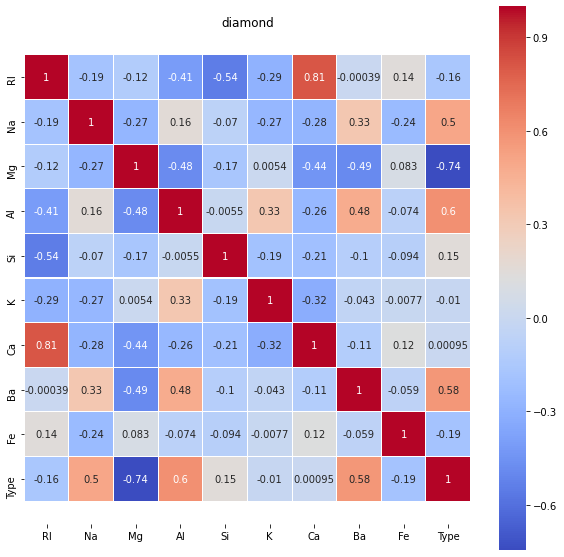

In [23]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(glass.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('diamond')
plt.show()

## Type과 연관도가 적은 Rl Si K Ca Fe를 제거

In [30]:
glass.drop(['RI','Si','K','Ca','Fe'], axis=1, inplace=True)

In [35]:
glass.head()

,Na,Mg,Al,Ba,Type
0,13.64,4.49,1.10,0.0,1
1,13.89,3.60,1.36,0.0,1
2,13.53,3.55,1.54,0.0,1
3,13.21,3.69,1.29,0.0,1
4,13.27,3.62,1.24,0.0,1


In [28]:
import seaborn as sns

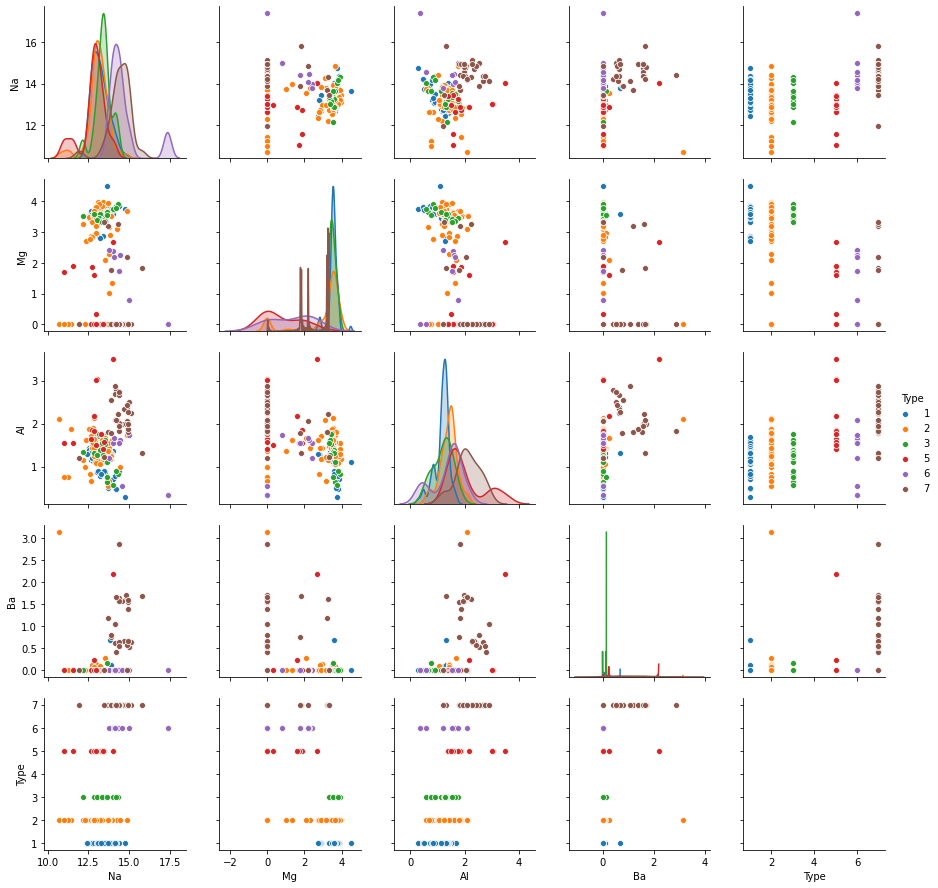

In [36]:
sns.pairplot(glass, hue='Type')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = glass.loc[:,['Na','Mg','Al','Ba']]
y = glass.loc[:,'Type']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=13)

In [40]:
x_train.head()

,Na,Mg,Al,Ba
90,12.93,3.74,1.11,0.00
198,14.38,0.00,2.66,0.64
94,12.71,3.33,1.49,0.00
125,12.93,3.66,1.56,0.00
10,12.72,3.46,1.56,0.00


In [41]:
x_test.head()

,Na,Mg,Al,Ba
78,13.92,3.52,1.25,0.00
208,14.37,0.00,2.74,0.54
191,14.85,0.00,2.38,0.64
181,14.99,0.78,1.74,0.00
131,13.70,0.00,1.36,0.00


# 모델 선정

In [42]:
from sklearn.model_selection import cross_val_score

### 1. SVC

In [43]:
from sklearn.svm import SVC

In [44]:
clf_svc = SVC()

In [45]:
clf_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
scores_svc = cross_val_score(clf_svc, x_train, y_train, cv = 10)

In [48]:
scores_svc

array([0.7       , 0.66666667, 0.72222222, 0.5       , 0.64705882,
       0.64705882, 0.76470588, 0.4375    , 0.86666667, 0.73333333])

In [49]:
scores_svc.mean()

0.6685212418300653

### 2. KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [52]:
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
scores_knn = cross_val_score(clf_knn, x_train, y_train, cv = 10)

In [57]:
scores_knn

array([0.7       , 0.5       , 0.66666667, 0.5       , 0.64705882,
       0.64705882, 0.70588235, 0.5       , 0.73333333, 0.6       ])

In [58]:
scores_knn.mean()

0.6199999999999999

### 3. DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [61]:
scores_tree = cross_val_score(clf_tree, x_train, y_train, cv = 10)

In [62]:
scores_tree

array([0.7       , 0.66666667, 0.72222222, 0.55555556, 0.58823529,
       0.58823529, 0.76470588, 0.4375    , 0.93333333, 0.66666667])

In [63]:
scores_tree.mean()

0.662312091503268

## SVC(66.8%)가 가장 적합

# 그리드 서치

In [64]:
from sklearn.model_selection import KFold, GridSearchCV

In [67]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
values = [0.001,0.01,0.1,1,10,100]
param_grid = [
    {'kernel':['rbf'], 'C':values, 'gamma':values},
    {'kernel':['linear'], 'C':values}
]

In [69]:
grid_search = GridSearchCV(clf_svc, param_grid, cv=kfold)

In [70]:
grid_search.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
grid_search.best_score_

0.6900584795321637

In [73]:
grid_search.score(x_test, y_test)

0.6744186046511628

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, y_pred)

0.627906976744186

In [81]:
from sklearn.metrics import classification_report

In [82]:
y_pred = clf_svc.predict(x_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.39      1.00      0.56         9
           2       0.88      0.39      0.54        18
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.50      0.67         2
           7       1.00      0.88      0.93         8

    accuracy                           0.63        43
   macro avg       0.67      0.63      0.59        43
weighted avg       0.73      0.63      0.61        43

